# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

Which variables would we need to **dummify**?

In [43]:
!pip install palmerpenguins
from palmerpenguins import load_penguins
penguins = load_penguins()

In [134]:
import sklearn
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from plotnine import *

In [51]:
lr = LinearRegression()

In [107]:
penguins = penguins.dropna()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


Let's use `bill_length_mm` to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Simple linear regression (e.g. straight-line) model
* Quadratic (degree 2 polynomial) model
* Cubic (degree 3 polynomial) model
* Degree 10 polynomial model

Make predictions for each model and plot your fitted models on the scatterplot.

In [130]:
# Response and predictor variables
y = penguins['bill_depth_mm']
X = penguins[['bill_length_mm']]

In [132]:
# Simple Linear Regression
Model_lr = lr.fit(X, y)
y_pred_lr = Model_lr.predict(X)

In [137]:
# Polynomial features
polynomial2 = make_pipeline(PolynomialFeatures((2)), lr)

# Quadratic (degree 2 polynomial) model
Model_sq = polynomial2.fit(X, y)
y_pred_sq = Model_sq.predict(X)

In [138]:
# Polynomial features
polynomial3 = make_pipeline(PolynomialFeatures((3)), lr)

# Cubic (degree 3 polynomial) model
Model_cb = polynomial3.fit(X, y)
y_pred_cb = Model_cb.predict(X)

In [139]:
# Polynomial features
polynomial10 = make_pipeline(PolynomialFeatures((10)), lr)

# Cubic (degree 3 polynomial) model
Model_ten = polynomial10.fit(X, y)
y_pred_ten = Model_ten.predict(X)

In [140]:
# Compiling predictions
predictions = pd.DataFrame({'y_pred_lr': y_pred_lr,
                            'y_pred_sq': y_pred_sq,
                            'y_pred_cb': y_pred_cb,
                            'y_pred_ten': y_pred_ten
                            })


/usr/local/lib/python3.10/dist-packages/plotnine/geoms/geom_path.py:98: PlotnineWarning: geom_path: Removed 11 rows containing missing values.
/usr/local/lib/python3.10/dist-packages/plotnine/geoms/geom_path.py:98: PlotnineWarning: geom_path: Removed 11 rows containing missing values.
/usr/local/lib/python3.10/dist-packages/plotnine/geoms/geom_path.py:98: PlotnineWarning: geom_path: Removed 11 rows containing missing values.
/usr/local/lib/python3.10/dist-packages/plotnine/geoms/geom_path.py:98: PlotnineWarning: geom_path: Removed 11 rows containing missing values.


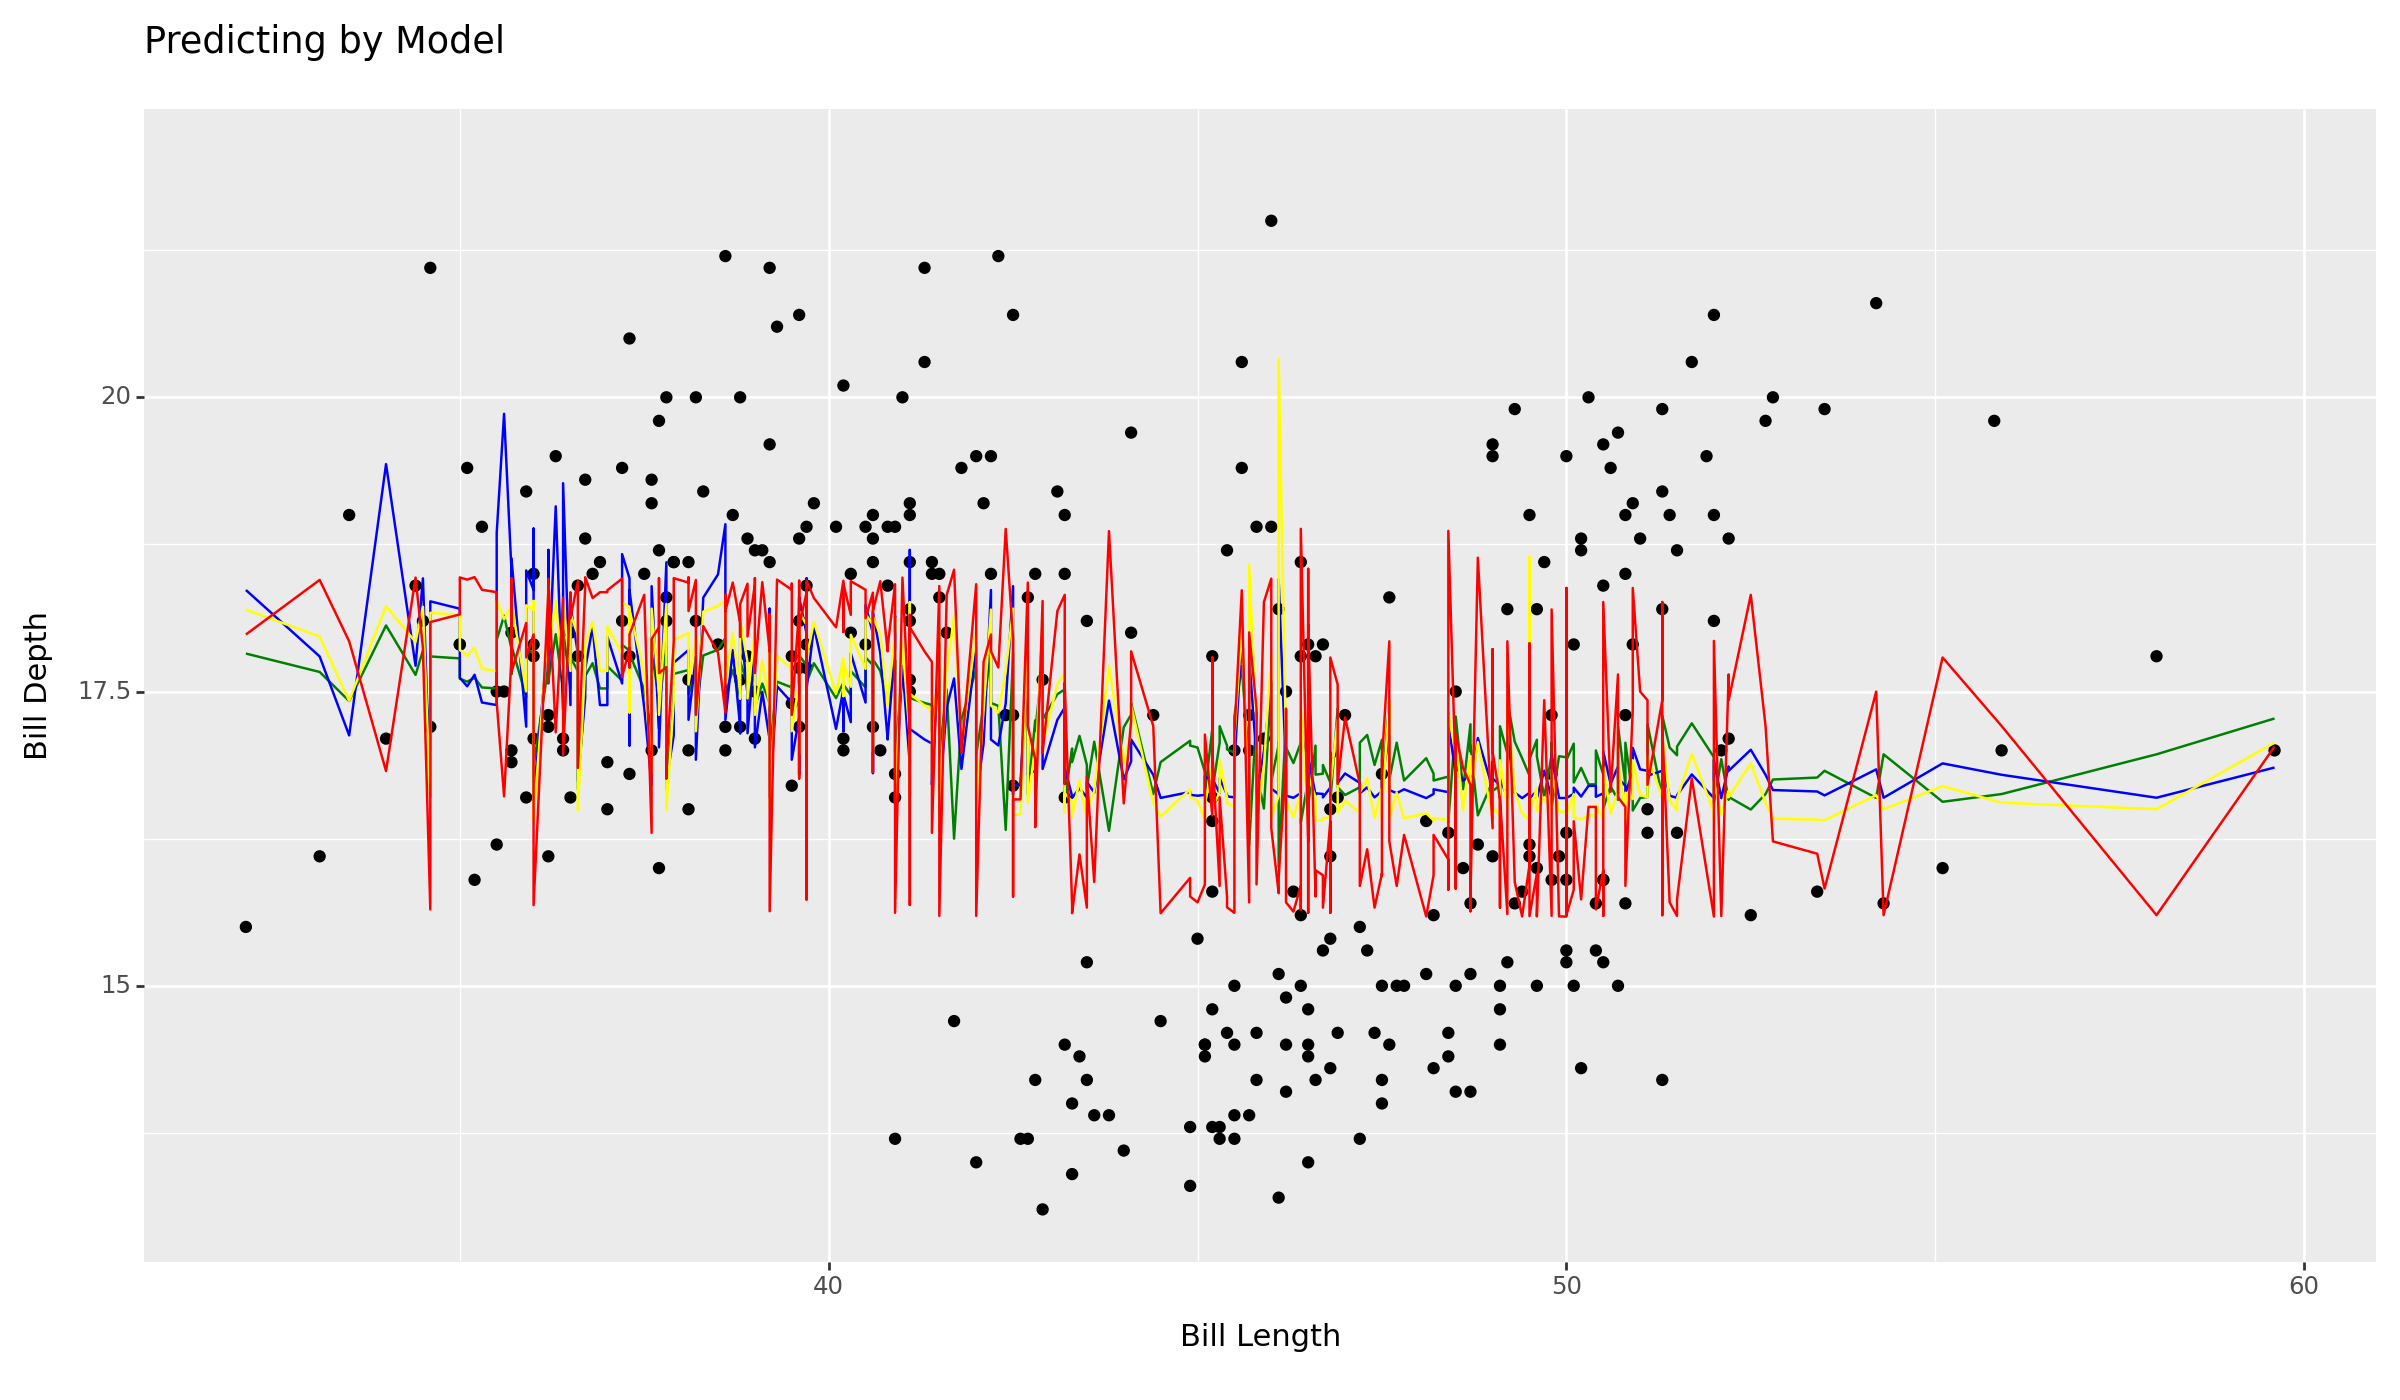

<Figure Size: (1200 x 700)>

In [146]:
# Plotting to compare the models
X = penguins['bill_length_mm']
y = penguins['bill_depth_mm']

(ggplot(penguins,
        aes(x = X, y = y))
+ geom_point()
+ geom_line(predictions, aes(y = y_pred_lr),
             color = 'green')
+ geom_line(predictions, aes(y = y_pred_sq),
             color = 'blue')
+ geom_line(predictions, aes(y = y_pred_cb),
             color = 'yellow')
+ geom_line(predictions, aes(y = y_pred_ten),
             color = 'red')
+ labs(x = 'Bill Length',
       y = 'Bill Depth',
       title = 'Predicting by Model')
+ theme(figure_size = (12,7))
)

* Are any of the models above underfitting the data? If so, which ones and how can you tell?
* Are any of thhe models above overfitting the data? If so, which ones and how can you tell?
* Which of the above models do you think fits the data best and why?

It's clear to see that essentially anything above a linear model is overfitting the data. I don't think that the linear model is underfitting the data because it still tracks changes over bill depth. For that reason, I think the linear model fits the data the best.